# Your info

Full name: Melika Ahmadi Ranjbar

Student ID: 97521036

# Q1. Perceptron

In [14]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# We define the initial weights.
Weights = np.array([0.1, 0.2, 0.4])

Inputs = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
Outputs = np.array([1, -1, -1, -1])

Etha = 0.1
Changed = 20


while Changed > 0.000000001:
  for x in range(4):
    functionOutput = np.dot(Weights, Inputs[x])
    Error = Outputs[x] - functionOutput
    Multiplied = Etha * Error * Inputs[x]
    Weights = Weights + Multiplied

    Changed = np.max(abs(Multiplied))
    Etha = Etha / 1.001

# Final weights and last difference
print("Final weights are: ", Weights, "Last error difference is: ", Changed)

  
  






Final weights are:  [-0.5 -0.5 -0.5] Last error difference is:  9.974005422769056e-10


In [16]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# Q2. Binary Classification

In [17]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.

class ActivationFunction:
  def Activate(self, Inputs, Weights, Outputs):
    if (np.dot(Inputs, Weights) > 0 and Outputs == 1):
      return True
    elif (np.dot(Inputs, Weights) < 0 and Outputs == -1):
      return True
    else:
      return False



Weights :  [  -1.3877228     1.         -379.42755013]


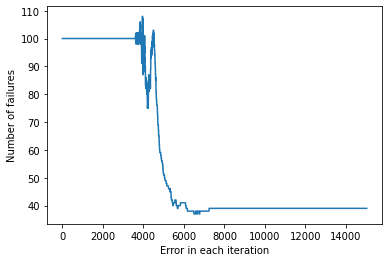

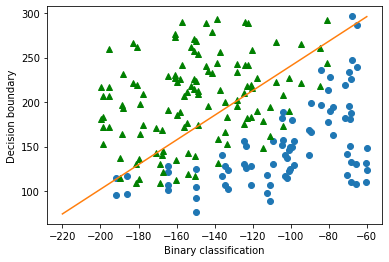

In [19]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.
# It's almost like the prevoius question

Weights = np.array([0.1, 0.2, 0.4])
Etha = 0.1
Activation = ActivationFunction()


# Read data.txt file to extract Input and Output array
DataSet = open('/content/data.txt', 'r')
Samples = DataSet.readlines()

InputsArray = []
OutputsArray = []
XListLeft = []
YListLeft = [] 
XListRight = []
YListRight = [] 


# Split by ,
for X in Samples:
  Splitted = X.split(",")
  x = float(Splitted[0])
  y = float(Splitted[1])
  InputsArray.append([x, y, 1])
  if float(Splitted[2]) == 0:
    OutputsArray.append(-1)
    XListLeft.append(x)
    YListLeft.append(y)
  else:
    OutputsArray.append(1)
    XListRight.append(x)
    YListRight.append(y)
  
  


# Change the arrays to Numpy
Inputs = np.array(InputsArray)
Outputs = np.array(OutputsArray)

# Errors array
ErrorList = []

Changed = 20 
while Changed > 0.0000000001:
  ErrorInEachIteration = 0
  for x in range(len(Samples)):
    functionOutput = np.dot(Weights, Inputs[x])
    Error = Outputs[x] - functionOutput
    Multiplied = Etha * Error * Inputs[x]
    Weights = (Weights + Multiplied) 

    # Normalize
    Weights /= np.min(abs(Weights))

    Changed = np.max(abs(Multiplied))
    Etha = Etha / 1.00001

    # Activation function
    if (Activation.Activate(Inputs[x], Weights, Outputs[x]) == False):
      ErrorInEachIteration += 1

  ErrorList.append(ErrorInEachIteration)

print('Weights : ', Weights)
# Plot the error of each iteration
ErrorNumpy = np.array(ErrorList)

# naming the x axis
plt.xlabel('Error in each iteration')
# naming the y axis
plt.ylabel('Number of failures')

plt.plot(ErrorNumpy)
plt.show()

# Plot points


XPointsLeft = np.array(XListLeft)
YPointsLeft = np.array(YListLeft)

XPointsRight = np.array(XListRight)
YPointsRight = np.array(YListRight)

plt.plot(XPointsLeft, YPointsLeft, 'o')
plt.plot(XPointsRight, YPointsRight, '^g')

# Plot the final result
x = np.linspace(-220, -60, 300)
y = x * 1.3877228 + 379.42755013
# Create the plot
# naming the x axis
plt.xlabel('Binary classification')
# naming the y axis
plt.ylabel('Decision boundary')

plt.plot(x, y)
  
# Show the plot
plt.show()

# Q4. MLP

In [20]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

import keras
from keras.layers import Dense
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7207 - acc: 0.8021 - val_loss: 0.2260 - val_acc: 0.9346
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2145 - acc: 0.9398 - val_loss: 0.1715 - val_acc: 0.9507
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1584 - acc: 0.9539 - val_loss: 0.1412 - val_acc: 0.9572
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1290 - acc: 0.9629 - val_loss: 0.

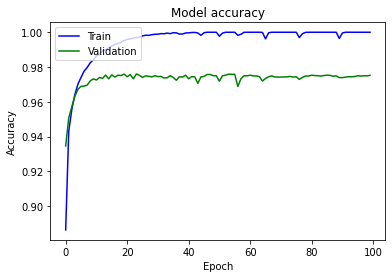

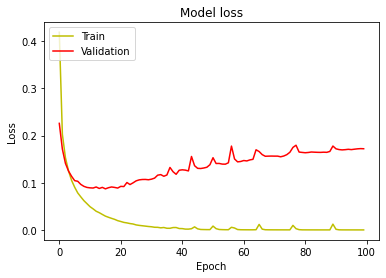

In [21]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# Attention: This code is with the help of a video, link below
# https://www.youtube.com/watch?v=fSJxZ_Gc9BM

# But I've totally understand it and declared every section of it in both code, and report 


# Get the training data and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Initialize the model we want to use for our neural network
Model = Sequential()

# Our data are pictures (2D -> 28 * 28 pixels) and we convert them into 784 inputs (Assume it as an array)
# We do this reshape operation with numpy, and for both training and test data 
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# Normalize input data valuesin order to result in better and more accurate answers
x_train = x_train / 255.0
x_test = x_test / 255.0

# Amplify all of the categories we have at the end [0 - 9]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


# Adding layers to our neural network model
# The second layer added is actually the last layer and gives us the classifications 
# Here we can add more layers to accelerate the operation (maybe) and increase accurancy
Model.add(Dense(64, input_shape = (784, ), activation = 'relu'))
Model.add(Dense(10, activation = 'softmax'))

# Complie and run the network
Model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])

# Sumps up the necessary information  
print(Model.summary())

# This part is for test and evaluation, epochs is number of iterations
History = Model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_data = (x_test, y_test), shuffle = True)

# Draw the error and accuracy diagrams (plot)

# Accuracy
plt.plot(History.history['acc'], 'b')
plt.plot(History.history['val_acc'], 'g')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Error (lose)
plt.plot(History.history['loss'], 'y')
plt.plot(History.history['val_loss'], 'r')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# Q5. Back-Propagation

In [23]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [24]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# These are different activation functions.
# ~Backward are their derivations, used in backpropagation step.

def relu(Z):
  # Z as cache
  A = np.maximum(0, Z)
  return A, Z

def reluBackward(dA, cache):
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ

def sigmoid(Z):
  # Z as cache
  A = 1. / (1 + np.exp(-Z))
  return A, Z

def sigmoidBackward(dA, cache):
  Z = cache
  s = 1 / (1 + np.exp(-Z))
  dZ = dA * s * (1 - s)
  return dZ

def softmax(Z):
  # Z as cache
  Z = Z - np.max(Z, axis=0, keepdims=True)
  exponents = np.exp(Z)
  A = exponents / np.sum(exponents, axis=0, keepdims=True)
  return A, Z

def softmaxBackward(dA, cache):
  Z = cache
  s, cache = softmax(Z)
  dZ = dA * s * (1 - s)
  return dZ


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Here x is actually a*v(j), and v(j) = Sigma(w(ji) * y(i))

def calculateV(vector1, vector2):
  return np.dot(vector1, vector2);


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Initialize weights and biases for each layer depending on number of neurons.

def initializeParameters(layers):
  parameters = {}
  for i in range(len(layers) - 1):
    parameters['W' + str(i + 1)] = np.random.randn(layers[i+1], layers[i]) * 0.01
    parameters['b' + str(i + 1)] = np.random.randn(layers[i+1], 1) * 0.01
  
  return parameters


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# The cost.
def computeCost(AL, Y):
  m = Y.shape[1]

  cost = (-1./ m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log( 1-AL)))
  
  return cost

def checkType(y):
  classes, m = y.shape

  # Binary
  if classes == 1:
    return np.greater_equal(y, 0.5, casting='same_kind')

  # Multiclass 
  else:
    return np.argmax(y, axis=0)

def computeAccuracy(AL, y):
  classes, m = y.shape

  if classes == 1:
    accuracy = 100 - np.mean(np.abs(AL - y)) * 100

  else:
    AL_classified = checkType(AL)
    y_classified = checkType(y)
    # Here we check how many answers were predicted right
    num_equals = np.sum(AL_classified == y_classified)
    accuracy = num_equals / m

  return accuracy


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# As explanation in the document, we have two kinds of passing the datas.
# Forward passing which is the first step, and we reach the result from output layer.
# Backpropagate the output layer's error to all of the hidden layers.
# Update the weights.


# We start with forward passing.

def linearForward(A, W, b):
  Z = calculateV(W, A) + b
  cache = (A, W, b)
  
  return Z, cache

# Now the pre-activation parameter is passed to an activation function.
# Activation fun ction result

def linearActivationForward(preActivation, W, b, activation):
  # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".

  if activation == "sigmoid":
    
    Z, linear_cache = linearForward(preActivation, W, b)
    A, activation_cache = sigmoid(Z)

  elif activation == "relu":

    Z, linear_cache = linearForward(preActivation, W, b)
    A, activation_cache = relu(Z)

  elif activation == "softmax":

    Z, linear_cache = linearForward(preActivation, W, b)
    A, activation_cache = softmax(Z)
  
  cache = (linear_cache, activation_cache)

  # Results in post-activation value.
  return A, cache

# Do it for all of the layers, calculate post-activation value.
# Until we're in last layer, and have the error in next part of code

def lModelForward(X, parameters):
  caches = []
  A = X
  L = len(parameters) // 2       
  
  for l in range(1, L):
    preActivation = A 
    A, cache = linearActivationForward(preActivation, 
                                          parameters["W" + str(l)], 
                                          parameters["b" + str(l)], 
                                          activation='relu')
    caches.append(cache)

  # It depends on our output layer's number of neurons    
  # Sigmoid if binary
  if parameters["W" + str(L)].shape[0] == 1:
    postActivation, cache = linearActivationForward(A, 
                                          parameters["W" + str(L)], 
                                          parameters["b" + str(L)], 
                                          activation='sigmoid')
  # Softmax if not
  else:
    postActivation, cache = linearActivationForward(A, 
                                          parameters["W" + str(L)], 
                                          parameters["b" + str(L)], 
                                          activation='softmax')
  caches.append(cache)
  return postActivation, caches


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


def linearBackward(dZ, cache):
  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1. / m) * np.dot(dZ, cache[0].T) 
  db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(cache[1].T, dZ)

  return dA_prev, dW, db

def linearActivationBackward(dA, cache, activation):
  linear_cache, activation_cache = cache
  
  if activation == "relu":

    dZ = reluBackward(dA, activation_cache)
    dA_prev, dW, db = linearBackward(dZ, linear_cache)
    
  elif activation == "sigmoid":

    dZ = sigmoidBackward(dA, activation_cache)
    dA_prev, dW, db = linearBackward(dZ, linear_cache)
  elif activation == "softmax":

    dZ = softmaxBackward(dA, activation_cache)
    dA_prev, dW, db = linearBackward(dZ, linear_cache)

  return dA_prev, dW, db


def lModelBackward(AL, Y, caches):
   
  grads = {}
  L = len(caches) # the number of layers
  m = AL.shape[1]
  Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

  # Calculate output layer error 
  
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  
  current_cache = caches[-1]
  
  # Binary one
  if Y.shape[0] == 1 :
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linearActivationBackward(dAL, current_cache, activation="sigmoid")
  
  else:
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linearActivationBackward(dAL, current_cache, activation="softmax")
  
  for l in reversed(range(L-1)):
    current_cache = caches[l]
    
    dA_prev_temp, dW_temp, db_temp = linearActivationBackward(grads["dA" + str(l + 2)], current_cache, activation="relu")
    grads["dA" + str(l + 1)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp

  return grads


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Updating the weights in order to get closer to the desired answer.

def updateParameters(parameters, grads, learning_rate):
  
  L = len(parameters) // 2 # number of layers in the neural network

  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
      
  return parameters


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, per100 = True):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    accuracies = []
    
    # Parameters initialization.
    parameters = initializeParameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = lModelForward(X, parameters)
        
        # Compute loss.
        # Compute cost.
        cost = computeCost(AL, Y)

        # Compute accuracy.
        accuracy = computeAccuracy(AL, Y)
        accuracies.append(accuracy)
    
        # Backward propagation.
        grads = lModelBackward(AL, Y, caches)

        # Update parameters.
        parameters = updateParameters(parameters, grads, learning_rate)
                
        # Print the cost and accuracy in each iteration of training example
        if per100:
          if print_cost and i % 100 == 0:
            print ("After iteration %i:" %i, "Cost: " , cost, "Accuracy: " , accuracy) 
            costs.append(cost)
        else:
          if print_cost :
            print ("After iteration %i:" %i, "Cost: " , cost, "Accuracy: " , accuracy) 
            costs.append(cost)
            
    print("Training Data Done!")
    print("**************************************************")

    
    return parameters, accuracies, costs


  # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

After iteration 0: Cost:  3.2509228552604252 Accuracy:  0.0663
After iteration 100: Cost:  0.8924992080930998 Accuracy:  0.86415
After iteration 200: Cost:  0.6216397430840498 Accuracy:  0.8976
After iteration 300: Cost:  0.542637371608977 Accuracy:  0.90875
After iteration 400: Cost:  0.49793736775874164 Accuracy:  0.916
After iteration 500: Cost:  0.46472791682725684 Accuracy:  0.9221
After iteration 600: Cost:  0.43643996444831207 Accuracy:  0.9273166666666667
After iteration 700: Cost:  0.4114069389075743 Accuracy:  0.932
After iteration 800: Cost:  0.3889481037350274 Accuracy:  0.9362666666666667
After iteration 900: Cost:  0.3686377931076473 Accuracy:  0.9397333333333333
Training Data Done!
**************************************************


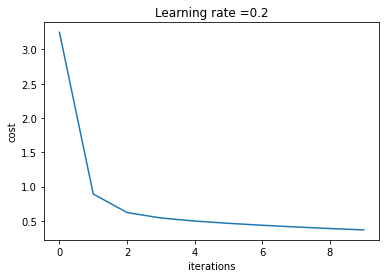

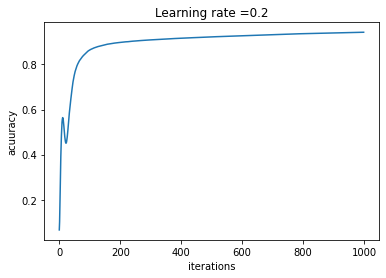

Accuracy for test data: 0.9404
Cost for test data: 0.348144422672689
Test Data Done!
**************************************************


In [25]:
# Q5_graded
# Do not change the above line.

# This cell is for your codes.
from keras.utils import np_utils

# Get the training data and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data using numpy

# Our data are pictures (2D -> 28 * 28 pixels) and we convert them into 784 inputs (Assume it as an array)
# We do this reshape operation with numpy, and for both training and test data 
x_train = x_train.reshape(60000, 784).astype('float32').T
x_test = x_test.reshape(10000, 784).astype('float32').T

# Normalize input data valuesin order to result in better and more accurate answers
x_train = x_train / 255.0
x_test = x_test / 255.0

Y_train = np_utils.to_categorical(y_train, 10).T
Y_test = np_utils.to_categorical(y_test, 10).T

learning_rate = 0.2

parameters, accuracies, costs = L_layer_model(x_train, Y_train, [784, 64, 10], learning_rate, 1000, print_cost = True, per100 = True)

# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

# plot the acuuracy
plt.plot(np.squeeze(accuracies))
plt.ylabel('acuuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

# Now time to test our model.
# Here we only need the final answer of forward passing.
# Final post-activation, becuase it shows us the result for test.

# Therefore we only call forward pass.
# Parameters are the model we've trained
# We want to compare Y_test which are the actual results, and post-activations.

postActivationTest, cache = lModelForward(x_test, parameters)
accuracyTest = computeAccuracy(postActivationTest, Y_test)
costTest = computeCost(postActivationTest, Y_test)
print('Accuracy for test data:', accuracyTest)
print('Cost for test data:', costTest)
print("Test Data Done!")
print("**************************************************")



# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.